### Titanic Example from Kaggle

Before Start analyzing Taxi data, just followed Titanic Survivor Case from Kaggle, to practice toolkits fit for data analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For Convenient usage of Matplotlib on Visualization
plt.style.use('seaborn')
sns.set(font_scale=2.5)

#Library to find-out missed data
import missingno as msno

#Warning Control Library in python
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### 1. Check Dataset

Check the data whether it contains empty, null data in the whole dataset

column: PassengerId	 Percent of NaN value: 0.00%
column: Survived  	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 19.87%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.00%
column: Cabin     	 Percent of NaN value: 77.10%
column: Embarked  	 Percent of NaN value: 0.22%


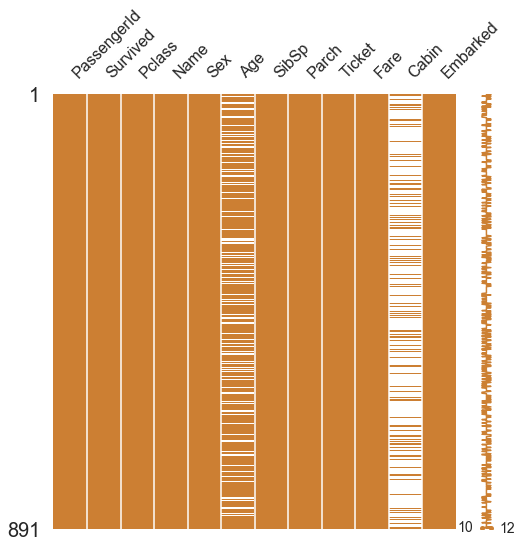

In [3]:
#1 Read CSV from Directory
df_train = pd.read_csv('titanic/train.csv') #Caution : No / before dir name
df_test = pd.read_csv('titanic/test.csv')

#2 See the Head(params) name and data composition
df_train.head()
df_train.describe() #Show basic stats of data

#3 Check Null Data
for column in df_train.columns:
    #{.2f} : until two decimal places
    #{:10} : Left Aligninig
    #format : show the number of rows in numpy
    msg = 'column: {:10}\t Percent of NaN value: {:.2f}%'.format(column, 100*(df_train[column].isnull().sum() / df_train[column].shape[0]))
    print(msg)
    
#4 Show the Null Data in Visualized way with MANO Library
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

### 2. Exploratory Data Analysis (Use Visualization Tool)

Seperately analyze each variables, and check the relationship between other variables

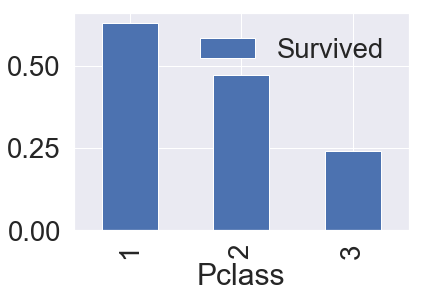

In [15]:
#1 PClass Check - Passenger Ticket Class Check

#PClass Data is Ordinal(서수형, Categorical Data with Orders) data

#Pclass와 Survived를 가져와서, count()는 전체 속한 사람들을 모두 보여줌
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

#.sum()은 survived=1인 사람들의 총합을 알려줌
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

#한눈에 보려면 pd.crosstab 사용도 가능하다
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

#.mean()을 추가하면 각 항목별로 평균치도 알 수 있음
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).mean()

#Pclass에 따른 평균 생존율을 Visualization해서 분석해보기
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

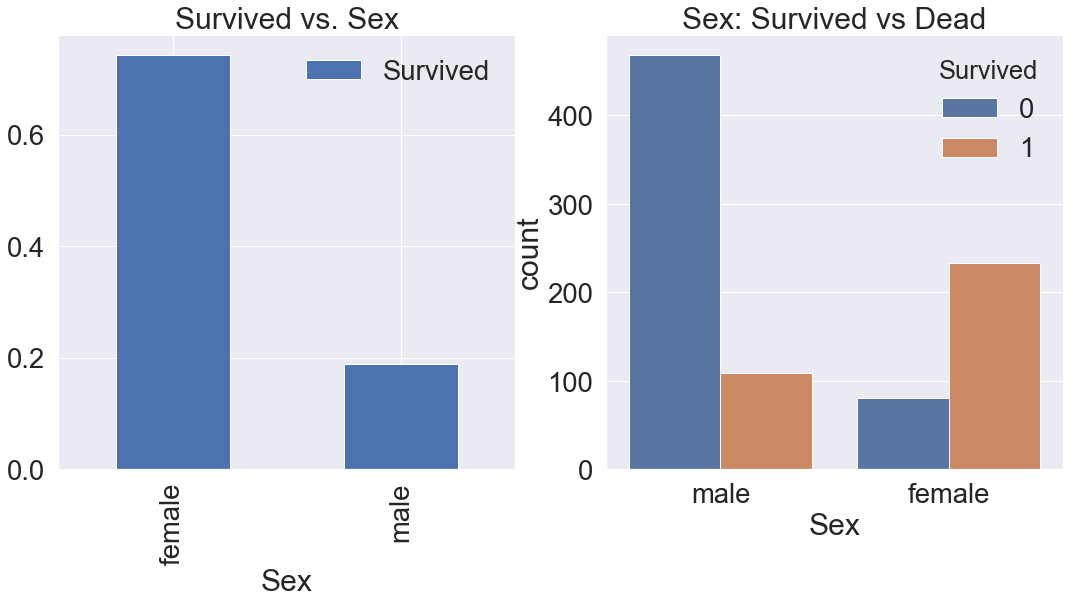

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [21]:
#2 Sex

f, ax = plt.subplots(1,2,figsize=(18,8))

#Plot1
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

#Plot2
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

#Crosstab으로 분석
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True)

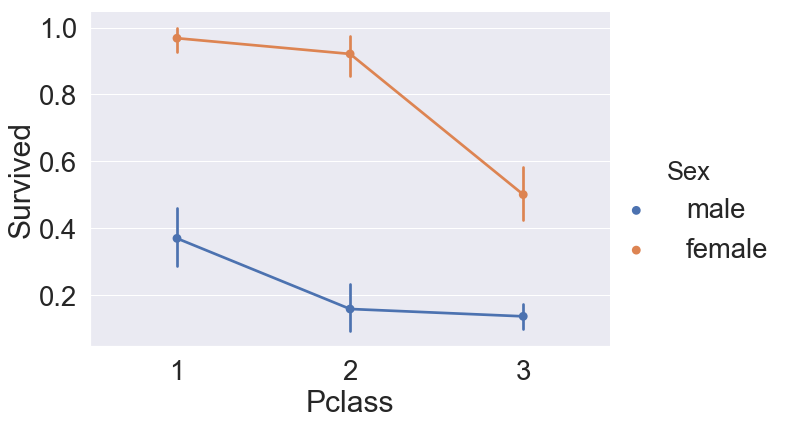

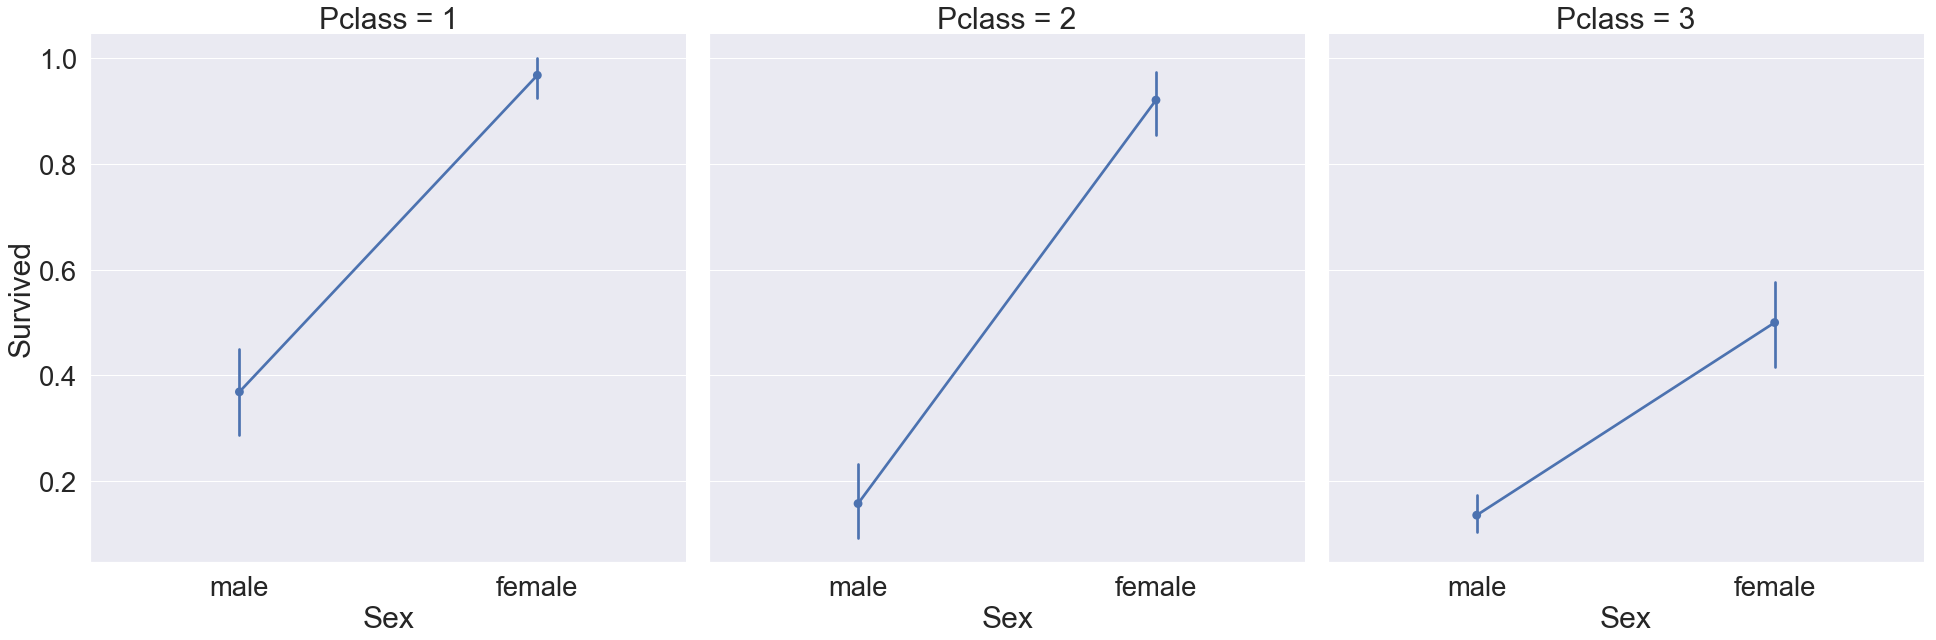

In [23]:
#Both Pclass & Sex at the same time

#3차원 그래프 생성
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

#각 항목별로 세분화해서 나누어보려면 hue를 column으로 변경

sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

### 3. Feature Engineering

Tuning params and data following one-hot encoding, classifcation, range differentiation, etc for better performance on ml process

In [ ]:
#Filling Null Data



### 4. Generate Model

Using sklearn, generate model for ml

### 5. Model Training and Prediction

### 6. Model Evaluation